# Ford Go Bike Data Exploration
## by Emmanuel Bett
## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area

## Investigation Overview
> In this analysis, I would like to figure out what kind of users there are based on user_types and which gender are the most bike users, how many bike stations are there, the relationship between age and trip duration, and the duration distribution based on user types

## Dataset Overview

> The Data Each trip includes:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("C:/Users/eyego/Downloads/Communicate-data-findings-Submission/FordGo_bike.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_dayofweek,day_of_week,start_hour,time_of_day,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,False,2,3,Thursday,17,Afternoon,869.750000
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,False,2,3,Thursday,12,Afternoon,1030.900000
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,False,2,3,Thursday,17,Afternoon,608.166667
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,True,2,3,Thursday,23,Night,26.416667
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,False,2,3,Thursday,23,Night,29.883333


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## The number of users based on user type

> The bike users are mostly subscribers, more than three quarters

Subscriber    158315
Customer       16560
Name: user_type, dtype: int64


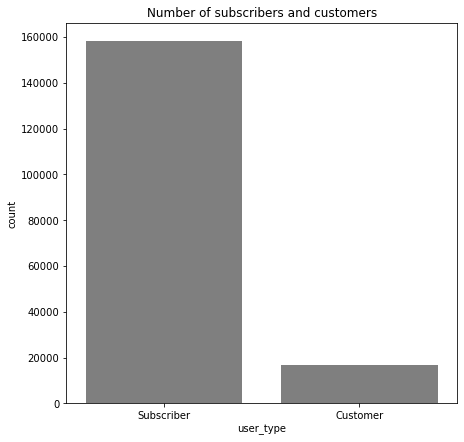

In [4]:
print(df['user_type'].value_counts())
plt.figure(figsize = (7,7))
sb.countplot(data = df, x = 'user_type', order = df['user_type'].value_counts().index, color = sb.color_palette()[7]);
plt.title('Number of subscribers and customers');

## The gender with the most bike users

> From the gender distribution males use bikes more than the female and other

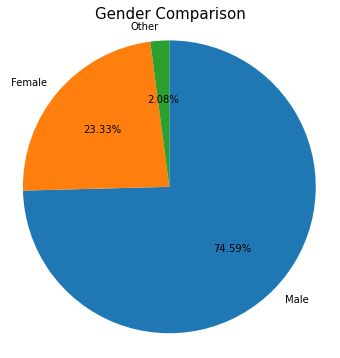

In [5]:
plt.figure(figsize=(10,6))
sorted_counts = df['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Gender Comparison', fontsize=15);

## The gender and trip duration for each user type
> Customers have higher trip duration but now we see this is true across all genders

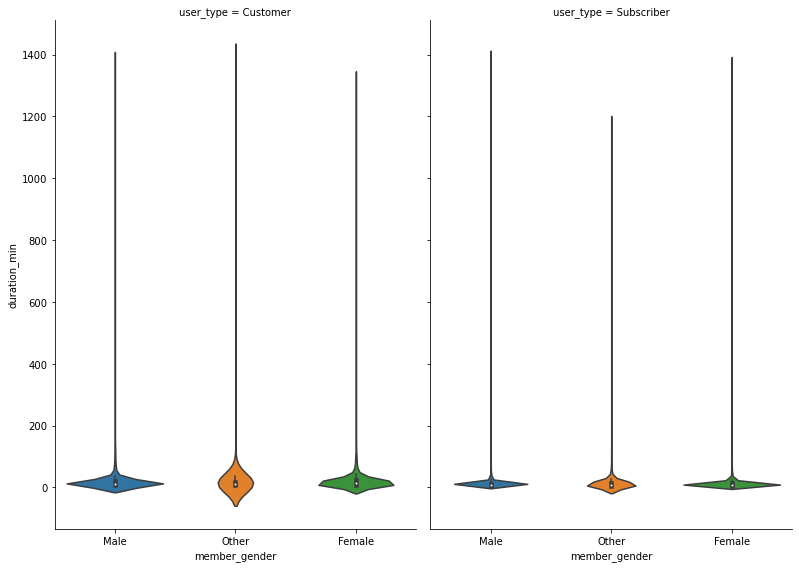

In [7]:
sb.catplot(x = "member_gender", y = "duration_min",
                col = "user_type",
                data = df, kind = "violin",
                height=8, aspect=.7);

## What is the daily usage of bikes?
> > FordGo bikes are mostly used on Thursdays as seen on the visualization below

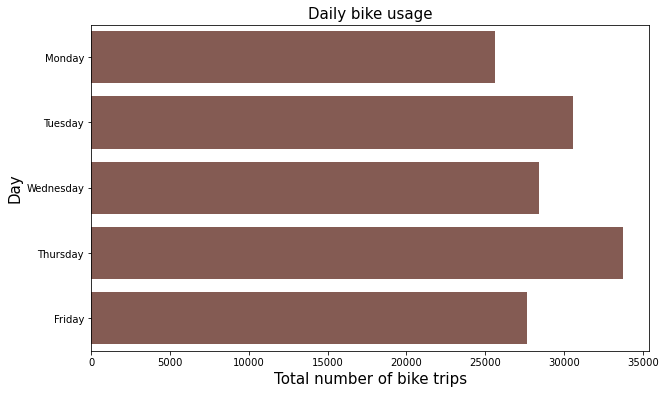

In [11]:
plt.figure(figsize=[10,6])
base_color = sb.color_palette()[5]
order = ['Monday','Tuesday','Wednesday','Thursday','Friday']
sb.countplot(data = df, y='day_of_week',color=base_color,order = order);
plt.xlabel('Total number of bike trips',fontsize = 15)
plt.ylabel('Day',fontsize = 15)
plt.title('Daily bike usage',fontsize = 15);

## What is the average trip duration for different user types?
> We can see although subscribers take a lot more trips than customers, the customers however take the most time on trips

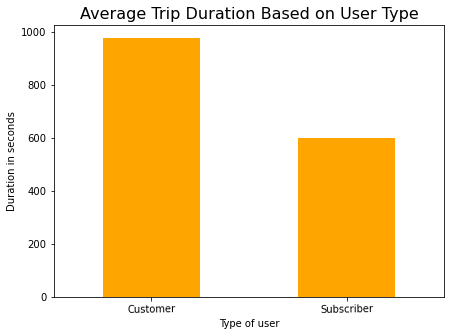

In [12]:
#lets plot a histogram of the average trip duration
# Set an upper limit of 6000 
df.query('duration_sec < 6000').groupby('user_type')['duration_sec'].mean().plot(kind='bar', figsize=(7,5), color = 'orange')
plt.title('Average Trip Duration Based on User Type', fontsize=16, fontweight=None)
plt.xlabel('Type of user')
plt.ylabel('Duration in seconds')
plt.xticks(rotation=1);

## What is the relation between user type and daily usage ?
> As seen from the visualization, each day of the week the subscribers take the most bike trips than the customer
> There is a sharp contrast between subscriber and customers

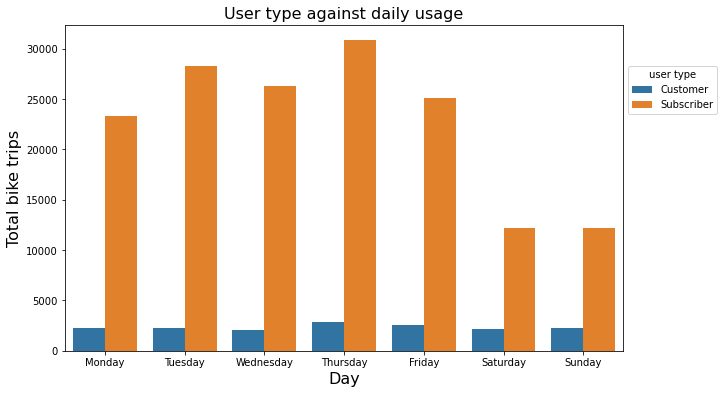

In [14]:
plt.figure(figsize=[10,6])

order = ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']

#categorical variables 

sb.countplot(data=df, x='day_of_week',hue ='user_type',order = order);
plt.xticks(rotation = 0);
plt.xlabel('Day',fontsize = 16)
plt.ylabel('Total bike trips',fontsize=16)
plt.title('User type against daily usage',fontsize=16);
# legend to right
plt.legend(title = 'user type',loc = 6, bbox_to_anchor = (1.0, 0.8))

## What is the bike ride comparison between User Groups in each Weekday ?
> As we can see from the visualization, subscribers are the most bike users compared to the customers as expected

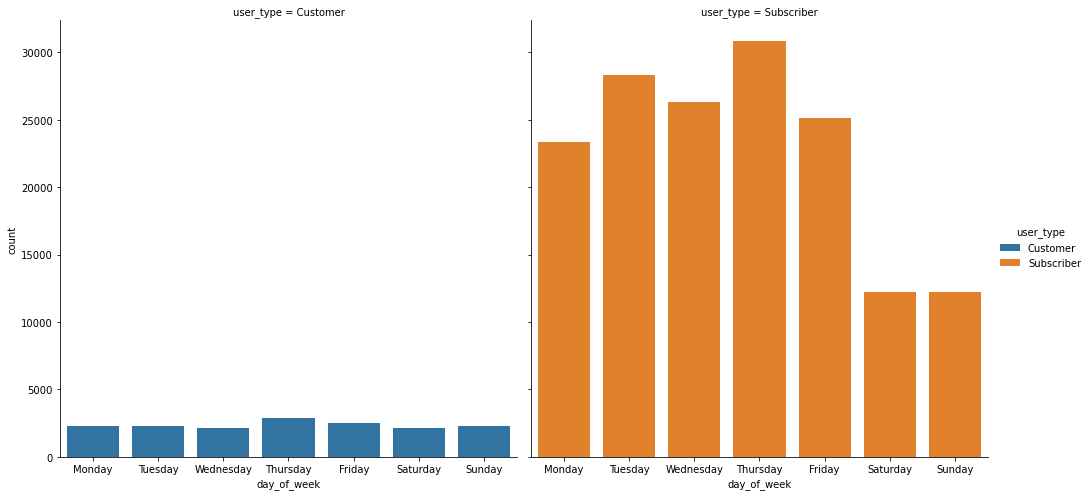

In [15]:
g = sb.FacetGrid(data = df, col='user_type', height=7 , hue = 'user_type')
order =['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
g = g.map(sb.countplot, "day_of_week", order = order );
g.add_legend()
plt.show()

## What is the average trip duration associated with user type and different days of the week?

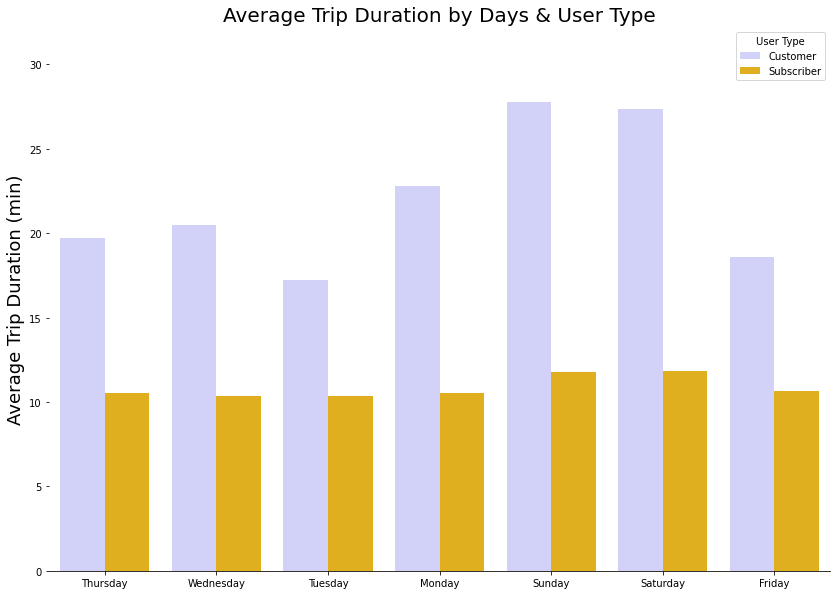

In [16]:
# setting figure size
plt.figure(figsize=[14, 10])

# color and plotting
palette = ['#CCCCFF', '#FFBF00']
ax = sb.barplot(data=df, x='day_of_week', y='duration_min',
                palette=palette, errwidth=0, hue='user_type')

# Polishing the figure
plt.title('Average Trip Duration by Days & User Type', fontsize=20)
plt.xlabel('')
plt.ylabel('Average Trip Duration (min)', fontsize=18)

# Hide the right, left and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# legends
plt.legend(title='User Type')
plt.show()

## What is the distribution of trip duration by day and gender?
- As before the average trip duration for females is higher on all days of the week, with Saturday and Sunday have the highest average trip duration.

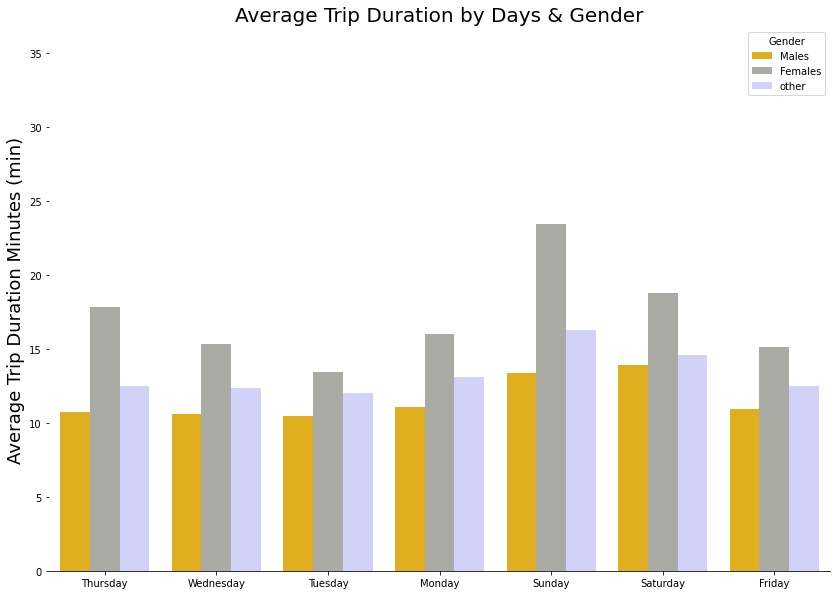

In [17]:
plt.figure(figsize=[14, 10])

# color and plotting
palette = ['#FFBF00', '#acaca4', '#CCCCFF']
ax = sb.barplot(data=df, x='day_of_week', y='duration_min',
                palette=palette, errwidth=0, hue='member_gender')

# Polishing the figure
plt.title('Average Trip Duration by Days & Gender', fontsize=20)
plt.xlabel('')
plt.ylabel('Average Trip Duration Minutes (min)', fontsize=18)

# Hide the right, left and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# adjusting legends
legends = plt.legend(title='Gender')
labels = ['Males', 'Females', 'other']
i = 0
for label in labels:
    legends.get_texts()[i].set_text(label)
    i += 1
plt.show()

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

In [11]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')